In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load each CSV file separately
df_2018 = pd.read_csv("/content/drive/MyDrive/Table data 2018.csv")
df_2019 = pd.read_csv("/content/drive/MyDrive/Table data 2019.csv")
df_2020 = pd.read_csv("/content/drive/MyDrive/Table data 2020.csv")

# Optional: Add a year column to each dataframe for reference
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020


# Merge them using pd.concat()
df = pd.concat([df_2018, df_2019, df_2020,], ignore_index=True)

print("Merged Dataset Shape:", df.shape)
print(df.head())


Merged Dataset Shape: (1138, 21)
         Date  Av­er­age views per view­er  Unique view­ers  \
0       Total                       0.0000              0.0   
1  2018-08-21                       1.1538             13.0   
2  2018-08-22                       1.1935             31.0   
3  2018-08-23                       1.3684             19.0   
4  2018-08-24                       1.0000              8.0   

   Im­pres­sions click-through rate (%)  Im­pres­sions  Com­ments ad­ded  \
0                                 11.50       101420.0             165.0   
1                                  7.38          122.0               2.0   
2                                 23.14          121.0               3.0   
3                                 20.65           92.0               1.0   
4                                 13.64           44.0               0.0   

   Shares  Likes (vs. dis­likes) (%)  Dis­likes  Sub­scribers lost  ...  \
0    50.0                      94.05       31.0         

In [ ]:
print("\n--- Data Cleaning ---")
print(df.info())
print("Missing values:\n", df.isnull().sum())

# Handle missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

# If you have an 'Upload Date' column:
if 'Upload Date' in df.columns:
    df['Upload Date'] = pd.to_datetime(df['Upload Date'], errors='coerce')
    df = df.dropna(subset=['Upload Date'])

print("After cleaning, shape:", df.shape)



--- Data Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  1138 non-null   object 
 1   Av­er­age views per view­er           1136 non-null   float64
 2   Unique view­ers                       1136 non-null   float64
 3   Im­pres­sions click-through rate (%)  1136 non-null   float64
 4   Im­pres­sions                         1136 non-null   float64
 5   Com­ments ad­ded                      1136 non-null   float64
 6   Shares                                1136 non-null   float64
 7   Likes (vs. dis­likes) (%)             1099 non-null   float64
 8   Dis­likes                             1136 non-null   float64
 9   Sub­scribers lost                     1136 non-null   float64
 10  Sub­scribers gained                   1136 non-null   float64

In [ ]:
print("\n--- EDA ---")
print(df.describe())

# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
print(numeric_df.corr())  # Calculate correlation for numeric columns only



--- EDA ---
       Av­er­age views per view­er  Unique view­ers  \
count                   991.000000       991.000000   
mean                      1.674537     28870.520686   
std                       0.318774     57837.394812   
min                       0.000000         0.000000   
25%                       1.471500       717.500000   
50%                       1.586700      5631.000000   
75%                       1.830200     23492.000000   
max                       2.615800    482254.000000   

       Im­pres­sions click-through rate (%)  Im­pres­sions  Com­ments ad­ded  \
count                            991.000000   9.910000e+02        991.000000   
mean                               5.990979   3.390949e+06        870.609485   
std                                1.359843   5.428572e+07      13702.928372   
min                                3.520000   1.220000e+02          0.000000   
25%                                4.970000   1.316750e+04          4.000000   
50%        

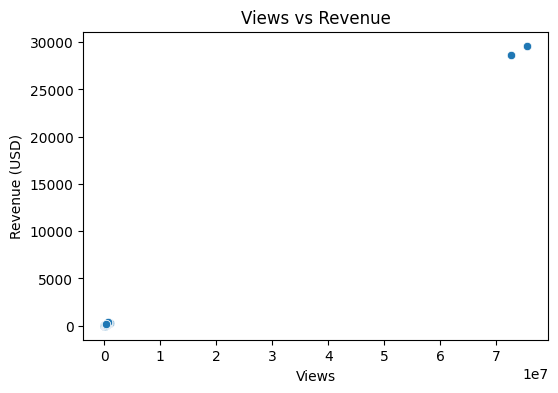

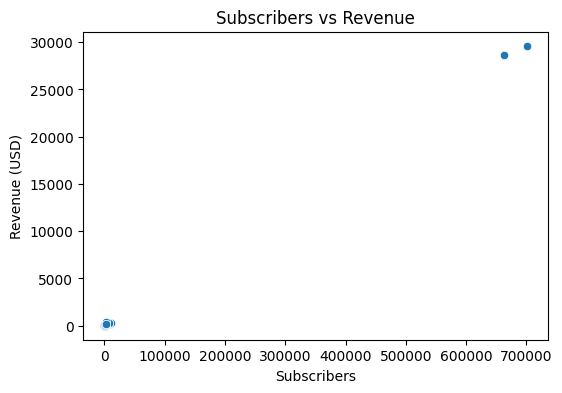

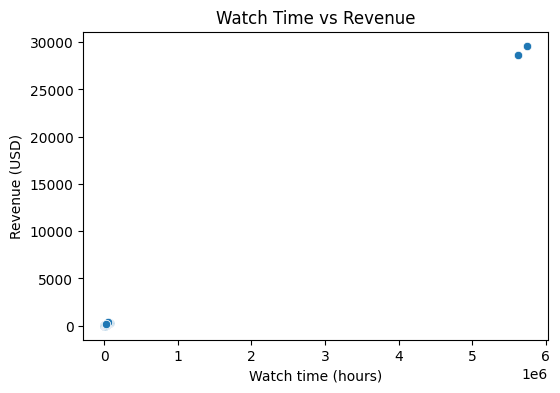

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation heatmap (simple)

# 2. Scatter Plot - Views vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Views'], y=df['Your es­tim­ated rev­en­ue (USD)'])
plt.title('Views vs Revenue')
plt.xlabel('Views')
plt.ylabel('Revenue (USD)')
plt.show()

# 3. Scatter Plot - Subscribers vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Sub­scribers'], y=df['Your es­tim­ated rev­en­ue (USD)'])
plt.title('Subscribers vs Revenue')
plt.xlabel('Subscribers')
plt.ylabel('Revenue (USD)')
plt.show()

# 4. Scatter Plot - Watch time vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Watch time (hours)'], y=df['Your es­tim­ated rev­en­ue (USD)'])
plt.title('Watch Time vs Revenue')
plt.xlabel('Watch time (hours)')
plt.ylabel('Revenue (USD)')
plt.show()


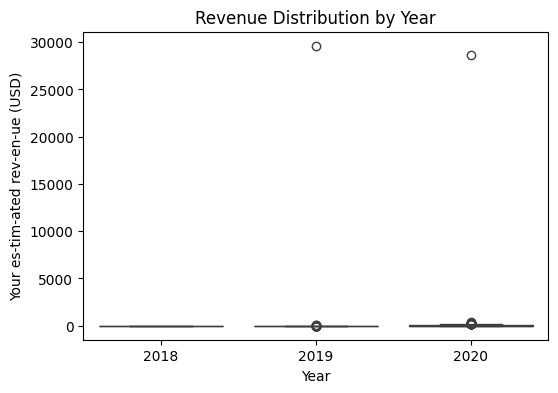

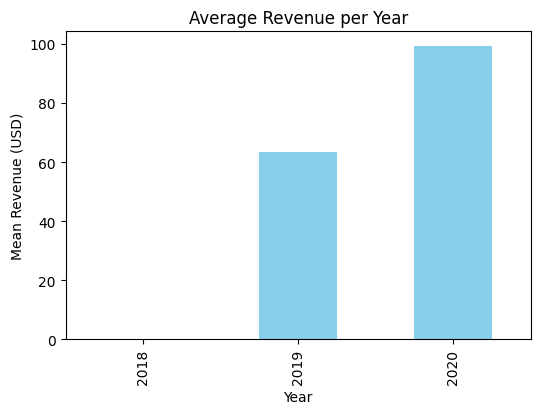

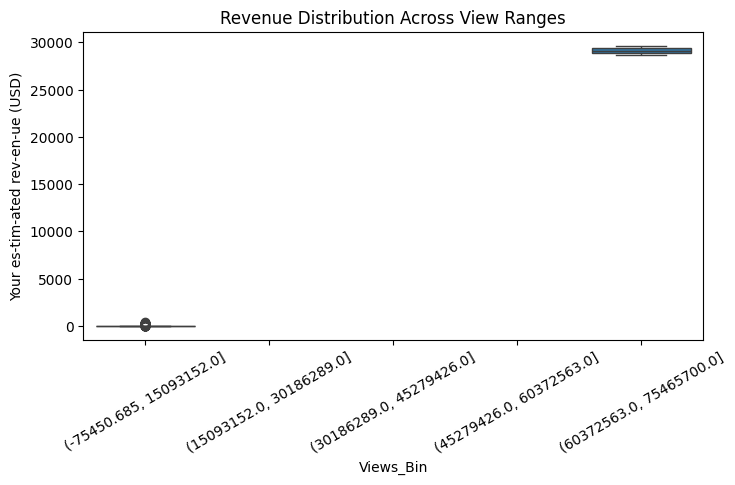

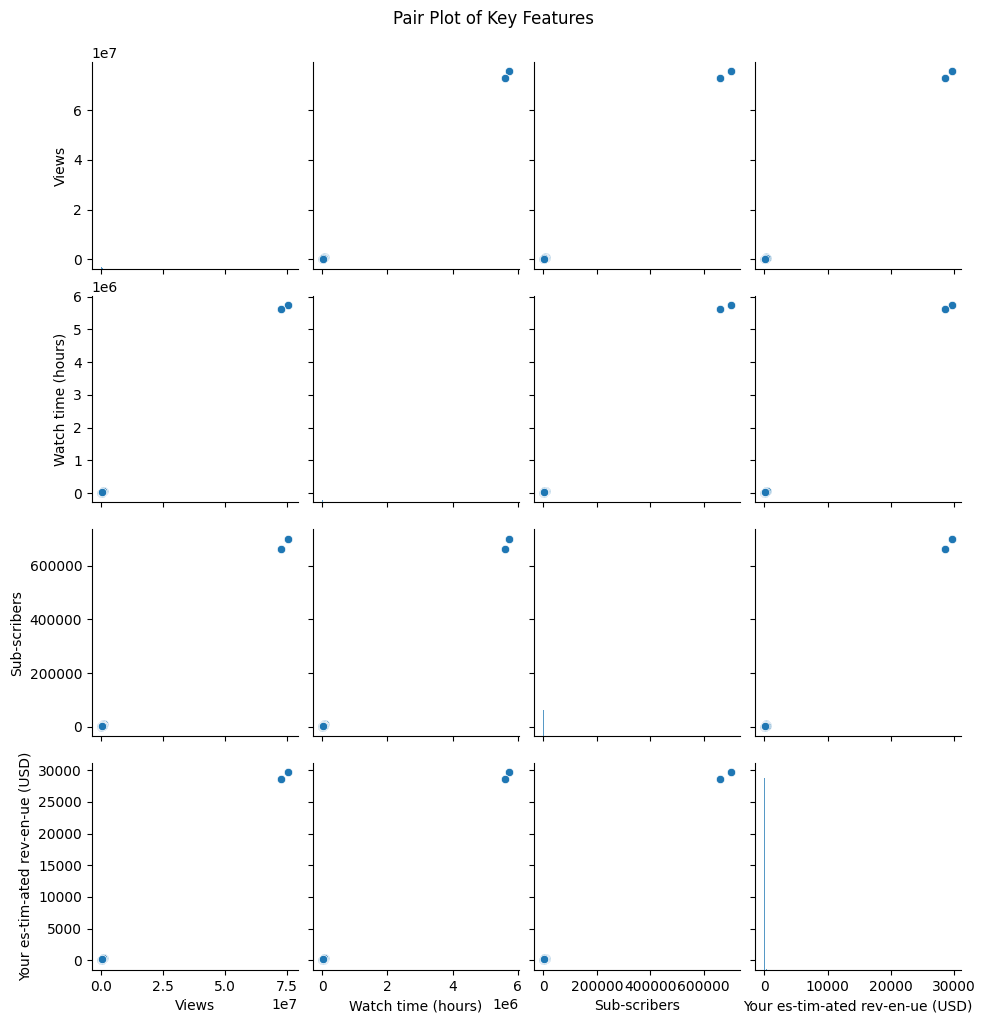

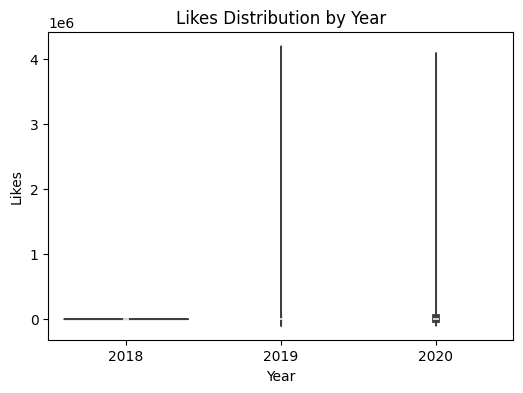

In [ ]:

# 5. Boxplot - Revenue by Year
plt.figure(figsize=(6,4))
sns.boxplot(x='Year', y='Your es­tim­ated rev­en­ue (USD)', data=df)
plt.title('Revenue Distribution by Year')
plt.show()

# 6. Bar Plot - Mean Revenue by Year
plt.figure(figsize=(6,4))
df.groupby('Year')['Your es­tim­ated rev­en­ue (USD)'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Revenue per Year')
plt.ylabel('Mean Revenue (USD)')
plt.show()

# 7. Boxplot - Revenue vs Views (Binned Views)
df['Views_Bin'] = pd.cut(df['Views'], bins=5)
plt.figure(figsize=(8,4))
sns.boxplot(x='Views_Bin', y='Your es­tim­ated rev­en­ue (USD)', data=df)
plt.title('Revenue Distribution Across View Ranges')
plt.xticks(rotation=30)
plt.show()

# 8. Pair Plot
sns.pairplot(df[['Views', 'Watch time (hours)', 'Sub­scribers', 'Your es­tim­ated rev­en­ue (USD)']])
plt.suptitle("Pair Plot of Key Features", y=1.02)
plt.show()

# 9. Violin Plot - Likes vs Revenue
plt.figure(figsize=(6,4))
sns.violinplot(x='Year', y='Likes', data=df)
plt.title('Likes Distribution by Year')
plt.show()

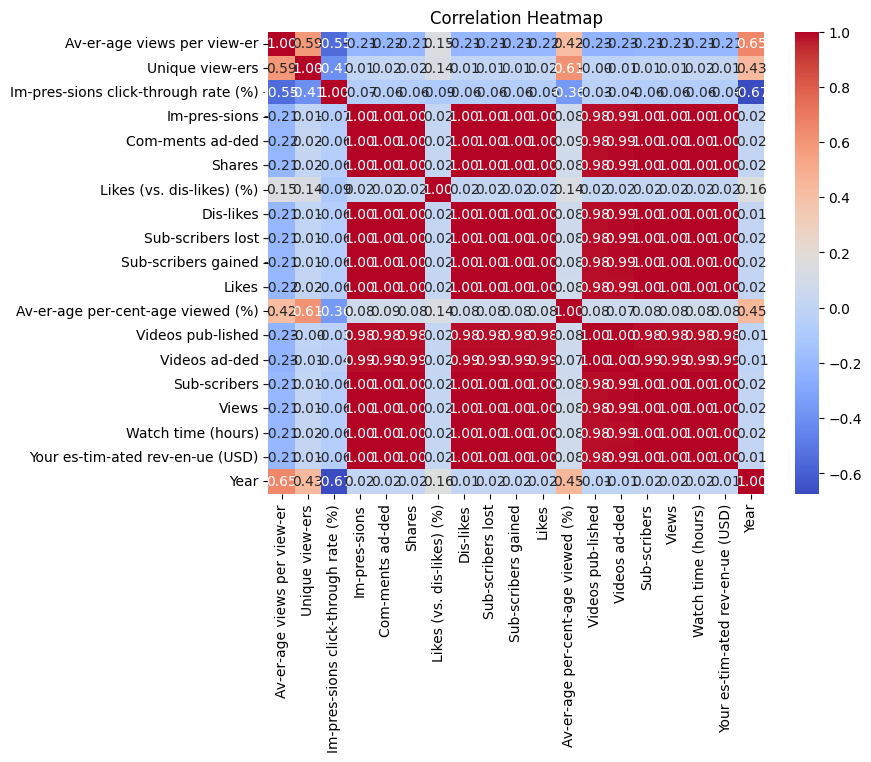

In [ ]:
# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix - This was missing!
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation = numeric_df.corr()  # Calculate and store in 'correlation'

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Selecting features (independent variables)
features = ['Views', 'Likes',  'Shares', 'Watch time (hours)','Sub­scribers','Sub­scribers gained','Dis­likes','Av­er­age per­cent­age viewed (%)']

X = df[features]  # Input variables
y = df['Your es­tim­ated rev­en­ue (USD)']  # Target variable

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Mean Squared Error (MSE): 48.66
R-squared (R2 Score): 0.98


In [ ]:
r2 = r2_score(y_test, y_pred)
accuracy_like = r2 * 100  # Convert to percentage

print(f"Model Accuracy (R² * 100): {accuracy_like:.2f}%")


NameError: name 'r2_score' is not defined

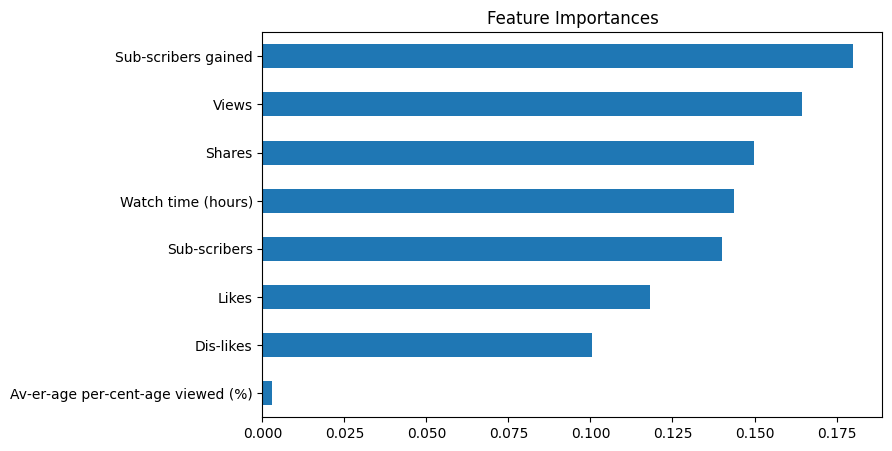

In [ ]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features)

plt.figure(figsize=(8,5))
feat_imp.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert continuous predictions to discrete classes
threshold = np.median(y_pred)  # Choose an appropriate threshold
y_pred_classes = np.where(y_pred >= threshold, 1, 0)
y_test_classes = np.where(y_test >= threshold, 1, 0)

# Calculate confusion matrix with discrete classes
cm = confusion_matrix(y_test_classes, y_pred_classes)
print(cm)

[[97  6]
 [ 2 94]]


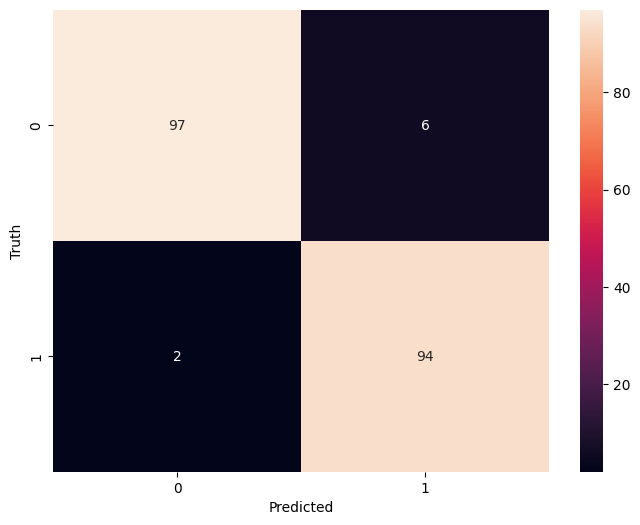

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
user_values = []

for feature in features:
    value = float(input(f"Enter value for {feature}: "))
    user_values.append(value)

custom_data = np.array([user_values])

custom_pred = rf.predict(custom_data)
predicted_usd = custom_pred[0]
usd_to_inr = 83  # Static or ask dynamically with input()
predicted_inr = predicted_usd * usd_to_inr
print(f"\nPredicted YouTube Revenue:")
print(f"In USD: ${predicted_usd:.2f}")
print(f"In INR: ₹{predicted_inr:,.2f}")


Enter value for Views: 456568
Enter value for Likes: 12335
Enter value for Shares: 2665
Enter value for Watch time (hours): 236
Enter value for Sub­scribers: 26395
Enter value for Sub­scribers gained: 236
Enter value for Dis­likes: 2315
Enter value for Av­er­age per­cent­age viewed (%): 86.3

Predicted YouTube Revenue:
In USD: $82.71
In INR: ₹6,864.91


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(rf, 'youtube_revenue_model.pkl')


['youtube_revenue_model.pkl']

In [ ]:
from google.colab import files
files.download('youtube_revenue_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>